<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#FSCR-BUSH-DIGITAL-SPECTROMETER-JUPYTER-NOTEBOOK" data-toc-modified-id="FSCR-BUSH-DIGITAL-SPECTROMETER-JUPYTER-NOTEBOOK-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>FSCR BUSH DIGITAL SPECTROMETER JUPYTER NOTEBOOK</a></span><ul class="toc-item"><li><span><a href="#BDS-Header-Block" data-toc-modified-id="BDS-Header-Block-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>BDS Header Block</a></span></li><li><span><a href="#Importing-Libraries-and-Notebooks" data-toc-modified-id="Importing-Libraries-and-Notebooks-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Importing Libraries and Notebooks</a></span></li><li><span><a href="#BDS-Configuration-Parameters" data-toc-modified-id="BDS-Configuration-Parameters-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>BDS Configuration Parameters</a></span></li><li><span><a href="#BDS-File-Output-Names" data-toc-modified-id="BDS-File-Output-Names-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>BDS File Output Names</a></span></li><li><span><a href="#Creating-the-Spectrometer-Camera-Object" data-toc-modified-id="Creating-the-Spectrometer-Camera-Object-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Creating the Spectrometer Camera Object</a></span></li><li><span><a href="#Obtaining-the-Raw-Image-of-the-Spectrum" data-toc-modified-id="Obtaining-the-Raw-Image-of-the-Spectrum-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Obtaining the Raw Image of the Spectrum</a></span></li><li><span><a href="#Draw-Visual-Aperture-and-Measure-Emission-Spectral-Peaks" data-toc-modified-id="Draw-Visual-Aperture-and-Measure-Emission-Spectral-Peaks-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Draw Visual Aperture and Measure Emission Spectral Peaks</a></span></li><li><span><a href="#Display-Emission-Spectrum-and-Compare-with-NIST-Standard-values" data-toc-modified-id="Display-Emission-Spectrum-and-Compare-with-NIST-Standard-values-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Display Emission Spectrum and Compare with NIST Standard values</a></span></li></ul></li></ul></div>

# FSCR BUSH DIGITAL SPECTROMETER JUPYTER NOTEBOOK

## BDS Header Block

In [1]:
# BUSH DIGITAL SPECTROMETER SOFTWARE INTERACTIVE VERSION
# Author - Chandru Narayan
# TEMPLATE FOR FCSR STUDENTS
# CN Version_12i  11/25/2019 cloned from automated version v11
#
#    120219 CN "Added function call to print BDS parameters"
#    120419 CN "Added function call to compute peaks in the spectrum wavelengths"
#    120619 CN "Added cell for bdscfg parms"
#    120619 CN "Added Try-Except Block for creating Camera Objects"
#    040424 CN "Udated code for deprecated methods"
#    040424 CN "Added Cloudy Sky Spectrum Standard"


In [2]:
#!pip install --upgrade pip
#!pip install opencv-python-headless
#!pip install peakutils

## Importing Libraries and Notebooks

In [3]:
import import_ipynb
from IPython.core.display import Image
from IPython.core.display import display
from IPython.display import IFrame
#import PIL
from PIL import Image as pilimg
from PIL import ImageDraw as pildraw
from PIL import ImageFont as pilfont
import os, sys
import time
from datetime import datetime
import cv2
import matplotlib.pyplot as plt

class StopExecution(Exception):
    def _render_traceback_(self):
        pass
    

/tmp/ipykernel_285/3525962275.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


In [4]:
# BUSH LIBRARY FUNCTIONS FOR BUSH DIGITAL SPECTROMETER SOFTWARE INTERACTIVE VERSION
# Author - Chandru Narayan
# TEMPLATE FOR FCSR STUDENTS
# CN Version_11i  12/1/2019 cloned from automated version v11
# IMPORT BDSLIB AND BDSCFG HERE
import bdslibv5

importing Jupyter notebook from bdslibv5.ipynb


## BDS Configuration Parameters

In [5]:
###
#    BUSH DIGITAL TELESCOPE SOFTWARE CONFIG SECTION
#    TO BE USED IN THE INTERACTIVE VERSION ONLY
#    FOR DETAILED DESCRIPTION OF PARMS SEE BDS CONFIG DOC 
###

#
# NAMING
#
source = 'cloudy'      
element = 'cloudy sky'                    
desc = 'cloudy sky spectrum' 

#
# CAMERA
#
shutter = 1000000

#
# CALIBRATION
#
wavelength_factor = 0.69
spectrum_angle = 0
slit_topadj = 110
slit_botadj = -20

#
# PLOTS
#
samp_th = 0.05
wlen_th = 35



## BDS File Output Names

In [6]:
# First let us set the date and time and we may not have internet access
# Uncomment/Edit/RUN statements below if spectroscope is not connected to the internet
# !date -s '2024-04-08 12:46:30'
# !date

In [7]:
#!date -s '2024-04-04 09:38:30'
#!date

In [8]:
# STEP 1. SETUP FILE BASENAMES WITH TIMESTAMPS
#       setup the source or basename for files
#       make it indicative of the spectrum you are taking
#       keep it short but meaningful. Do not name "a1" etc!
#source = 'cfls'

# Filenames be appended with date and time 
# such that they will not be overwritten 
now = datetime.now()
name = source + now.strftime("%m%d%H%M%S")
raw_filename = name + "_raw"
ovl_filename = name + "_ovl"
cht_filename = name + "_cht"
tbl_filename = name + "_tbl"
par_filename = name + "_par"
pks_filename = name + "_pks"

In [9]:
################## STUDENT TO ADD EDITS BELOW ################################
## WRITE A STATEMENT TO PRINT THE 4 OUTPUT NAMES FROM THE BDS SOFTWARE TO FAMILIARIZE YOURSELF

print(raw_filename)
print(ovl_filename)
print(cht_filename)
print(tbl_filename)
print(par_filename)
print(pks_filename)

cloudy0502200038_raw
cloudy0502200038_ovl
cloudy0502200038_cht
cloudy0502200038_tbl
cloudy0502200038_par
cloudy0502200038_pks


In [10]:
################## STOP HERE STUDENT/INSTRUCTOR TO VALIDATE STEP 1 ####################
## VALIDATE THE NAMES OF FILES TO BE CREATED - DO THEY LOOK RIGHT ??? ##

# DO NOT GO FORWARD UNTIL INSTRUCTOR VALIDATES

## Obtaining Image of Spectrum


In [11]:
# STEP 2. CREATE THE CAMERA OBJECT
#         CAPTURE THE RAW SPECTRUM IMAGE
#         THIS WILL BE EXAMINED FOR ANY ADJUSTMENTS NEEDED
#         FOR EXAMPLE IMAGE BRIGHTNESS LIGHT LEAKAGE ETC
#         DISPLAY CAPTURED IMAGE

[0:47:22.950801689] [309]  INFO Camera camera_manager.cpp:297 libcamera v0.0.5+83-bde9b04f
[0:47:22.992253189] [310]  INFO RPI vc4.cpp:437 Registered camera /base/soc/i2c0mux/i2c@1/ov5647@36 to Unicam device /dev/media4 and ISP device /dev/media1
[0:47:22.992568596] [310]  INFO RPI pipeline_base.cpp:1101 Using configuration file '/usr/share/libcamera/pipeline/rpi/vc4/rpi_apps.yaml'
[0:47:22.994279281] [309]  INFO Camera camera.cpp:1033 configuring streams: (0) 2592x1944-YUV420 (1) 2592x1944-SGBRG10_CSI2P
[0:47:22.995136596] [310]  INFO RPI vc4.cpp:565 Sensor: /base/soc/i2c0mux/i2c@1/ov5647@36 - Selected sensor format: 2592x1944-SGBRG10_1X10 - Selected unicam format: 2592x1944-pGAA
Still capture image received


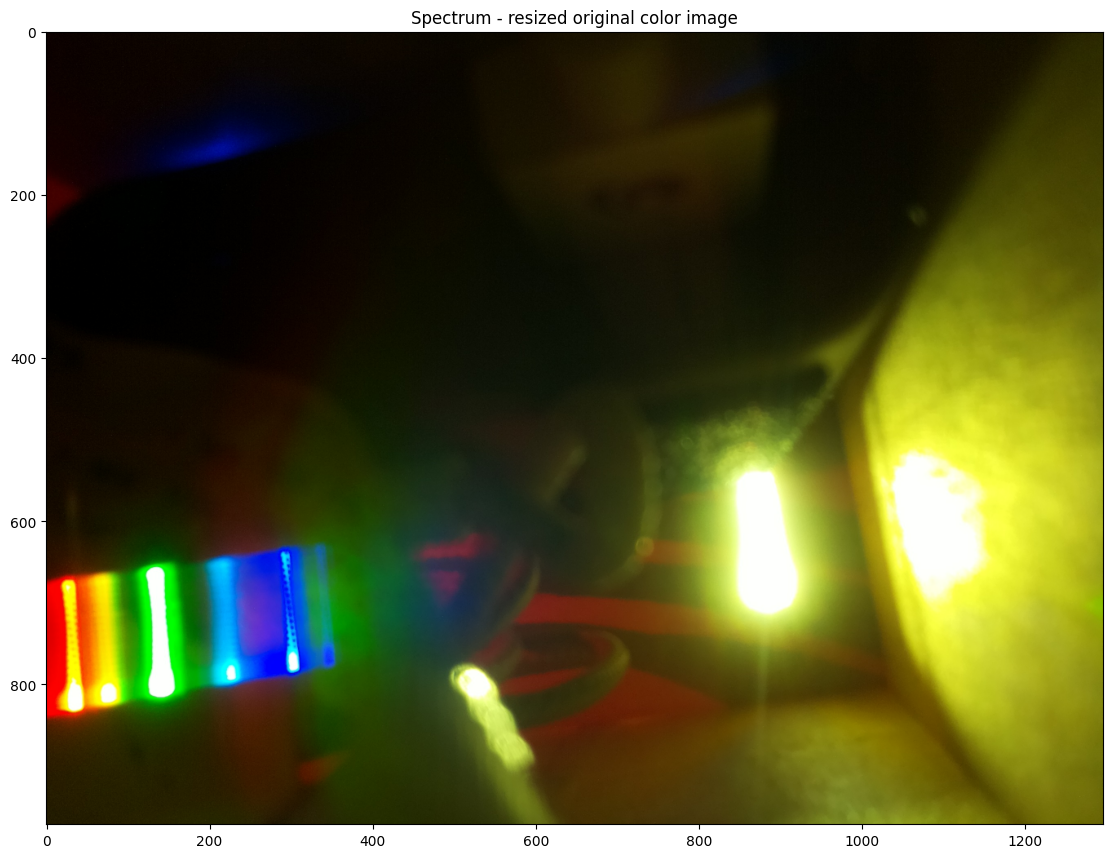

In [12]:
raw_jpg_filename=bdslibv5.take_image(shutter)
bdslibv5.show_image(raw_jpg_filename)

## Displaying Processed Image of Spectrum with parameters

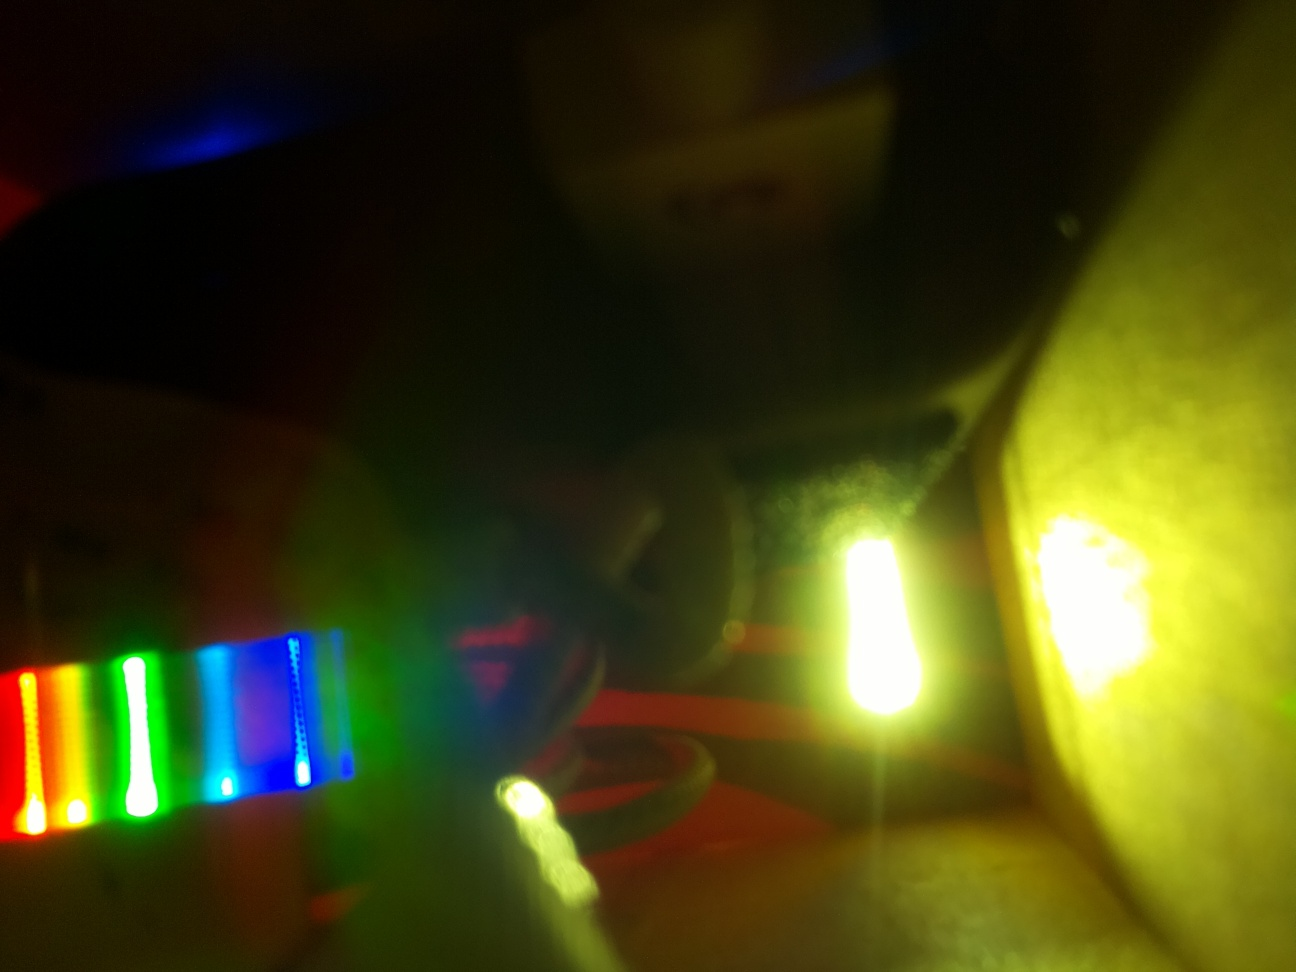

Title:		 CLOUDY SKY SPECTRUM
BDS parameters used for this run:
Spectrum Base Name is          	 cloudy0502200038
Camera Shutter is:             	 1000000
Slit Top Adjustment is:        	 110
Slit Bottom Adjustment is:     	 -20
Camera Spectrum Angle is:      	 0
Camera Wavelength Factor is:   	 0.69
Amplitude Threshold is:        	 0.05
Wavelength Threshold is:       	 35


In [13]:
#       view image and apply putty or tape inside spectroscope to prevent light leakage
#       remember - image is flipped laterally from left right!
display(Image(raw_jpg_filename))
bdslibv5.display_bds_params(name,desc,shutter,slit_topadj,slit_botadj,spectrum_angle,wavelength_factor,samp_th,wlen_th)

## Draw Visual Aperture and Measure Emission Spectral Peaks 

In [14]:
# STEP 3. PROCESS THE IMAGE AND LOCATE THE SLIT (APERTURE)
#         READ RAW JPG FILE OBTAINED IN A PIXEL ARRAY
#         RECORD THE PIXEL WIDTH AND HEIGHT
#         NARROW THE PIXEL WINDOW FOR SLIT TOP AND BOTTOM
#         FOR EXAMPLE IMAGE BRIGHTNESS LIGHT LEAKAGE ETC
#         DISPLAY CAPTURED IMAGE

In [15]:
#         READ RAW JPG FILE OBTAINED IN A PIXEL ARRAY
im = pilimg.open(raw_jpg_filename)
pic_pixels = im.load()
#         record the pixel width and height
width = im.size[0]
height = im.size[1]
print("width is %d, height is %d" % (width, height))
#        The slit needs to be shortened in height at times due to light leakage
#        inside spectrometer. This small adjustment can be made here. 
#        bigger negative numbers for smaller for bottom slit 
#        bigger positive numbers for smaller top slit 
#        for daylight or bright spectrum we need to narrow the slit greatly.
#        default values are set above
#        Adjust and uncomment below if you need
#slit_topadj = 0
#slit_botadj = -0

#        call library function to find the aperture in the raw image (pixel array)
aperture = bdslibv5.find_aperture(pic_pixels, width, height, slit_topadj, slit_botadj)
#        draw the aperture
draw = pildraw.Draw(im)
bdslibv5.draw_aperture(aperture, draw)


width is 1296, height is 972
aperture_x b4 avg is: 862
aperture_x1 is: 844
aperture_x2 is: 903
avg aperture_x is: 873.5
spectrum_top is 538 spectrum bottom is 712
adj spectrum_top is 648 adj spectrum bottom is 692


In [16]:
#        Draw scan line using the Spectrum angle
#        This is the angle that the camera and diffration grating makes with the light path
#        The Spectrum Angle trignometric tangent of the angle the camera and diffration grating makes 
#        with the line of sight to the entry slit. This usually does not need to be changed very much 
#        as it manipulates where in the observation area the spectrum falls. It only needs to be 
#        approximate such that pixel counter can find it
#        default values are set above
#        Adjust and uncomment below if you need
#spectrum_angle = 0.01
#        draw the scan lline
bdslibv5.draw_scan_line(aperture, draw, spectrum_angle)

In [17]:
#        The wavelength_factor is the variable used for calibrating the spectroscope such that 
#        the calibration spectral line matches the known standard for that emission spectrum
#        The wavelength_factor is close to 0.90 for the 1000 lines/mm diffration grating
#        The wavelength_factor is close to 0.60 for the 500 lines/mm diffration grating
#        default values are set above
#        Adjust and uncomment below if you need
#wavelength_factor = 0.9 
try:
    results, max_result = bdslibv5.draw_graph(draw, pic_pixels, aperture, spectrum_angle, wavelength_factor)
except:
    #camera.close()
    print("Exception while creating an aperture")
    print("This run **** TERMINATED PREMATURELY **** ...")
    print("Maybe the result of misaligned light path a very dim spectrum")
    print("Adjust Light Path Alignment OR Increase Shutter parameter and try again")    
    raise StopExecution
else:
    print("Producing graphical result");

Producing graphical result


In [18]:
#        Display actual and ideal targets for camera exposure corrections
bdslibv5.inform_user_of_exposure(max_result)

ideal exposure between 0.15 and 0.30
exposure= 1.6475655691341966
consider reducing shutter time



In [19]:
#       Create the spectrum image overlaid with aperture and scan line
ovl_jpg_filename = ovl_filename + ".jpg"
bdslibv5.save_image_with_overlay(im, ovl_jpg_filename)


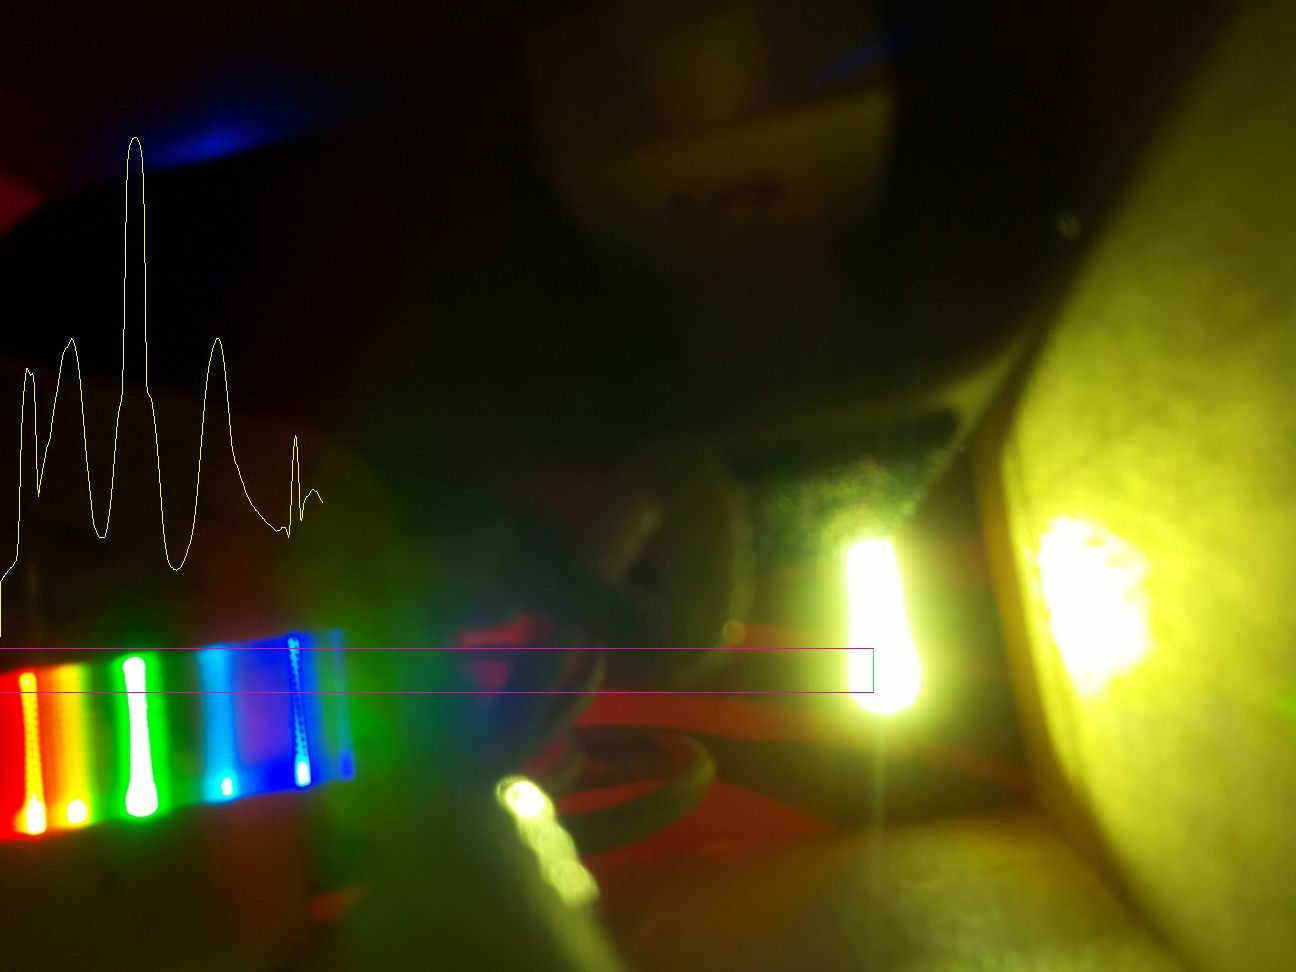

Title:		 CLOUDY SKY SPECTRUM
BDS parameters used for this run:
Spectrum Base Name is          	 cloudy0502200038
Camera Shutter is:             	 1000000
Slit Top Adjustment is:        	 110
Slit Bottom Adjustment is:     	 -20
Camera Spectrum Angle is:      	 0
Camera Wavelength Factor is:   	 0.69
Amplitude Threshold is:        	 0.05
Wavelength Threshold is:       	 35


In [20]:
#       View the Overlaid image fix parameters and rerun STEP 3 ONLY from the beginning as needed
display(Image(ovl_jpg_filename))
bdslibv5.display_bds_params(name,desc,shutter,slit_topadj,slit_botadj,spectrum_angle,wavelength_factor,samp_th,wlen_th)

In [21]:
################## STOP HERE STUDENT/INSTRUCTOR TO VALIDATE STEP 3 ####################
## IS THE ACTUAL EXPOSURE WITHIN THE TARGET LIMITS ??
## DID A RECTANGULAR WINDOW APPEAR OVERLAID ON THE IMAGE  ENCLOSING THE SPECTRUM ??
## IS THE SCAN LINE VISIBLE ??
## IS THE SCAN LINE ALIGNED WITH THE SLIT ??
## IF NOT WE HAVE TO MAKE ADJUSTMENTS BEFORE PROCEEDING
## READ INSTRUCTIONS IN VARIOUS CELLS ON THIS STEP
## MAKE CHANGES AND ASK FOR ME TO VALIDATE BEFORE PROCEEDING

# DO NOT GO FORWARD UNTIL INSTRUCTOR VALIDATES

## Display Emission Spectrum and Compare with NIST Standard values

In [22]:
cht_png_filename = cht_filename + ".png"
print(cht_png_filename)

cloudy0502200038_cht.png


In [23]:
# STEP 4 FINAL STEP! NORMALIZE AND CREATE/DISPLAY SPECTRUM CHART
# MAKE ADJUSTMENTS AND RERUN FROM THE BEGINNING IF NEEDED
normalized_results = bdslibv5.normalize_results(results, max_result)

In [24]:
#       Create the spectrum chart overlaid with the proper wavelengths 
#       and color map according to frequency
cht_png_filename = cht_filename + ".png"
bdslibv5.export_diagram(cht_png_filename, normalized_results)

In [25]:
#display(Image(cht_png_filename))
#bdslibv5.display_bds_params(name,desc,shutter,slit_topadj,slit_botadj,spectrum_angle,wavelength_factor,samp_th,wlen_th)


Title:		 CLOUDY SKY SPECTRUM
BDS parameters used for this run:
Spectrum Base Name is          	 cloudy0502200038
Camera Shutter is:             	 1000000
Slit Top Adjustment is:        	 110
Slit Bottom Adjustment is:     	 -20
Camera Spectrum Angle is:      	 0
Camera Wavelength Factor is:   	 0.69
Amplitude Threshold is:        	 0.05
Wavelength Threshold is:       	 35


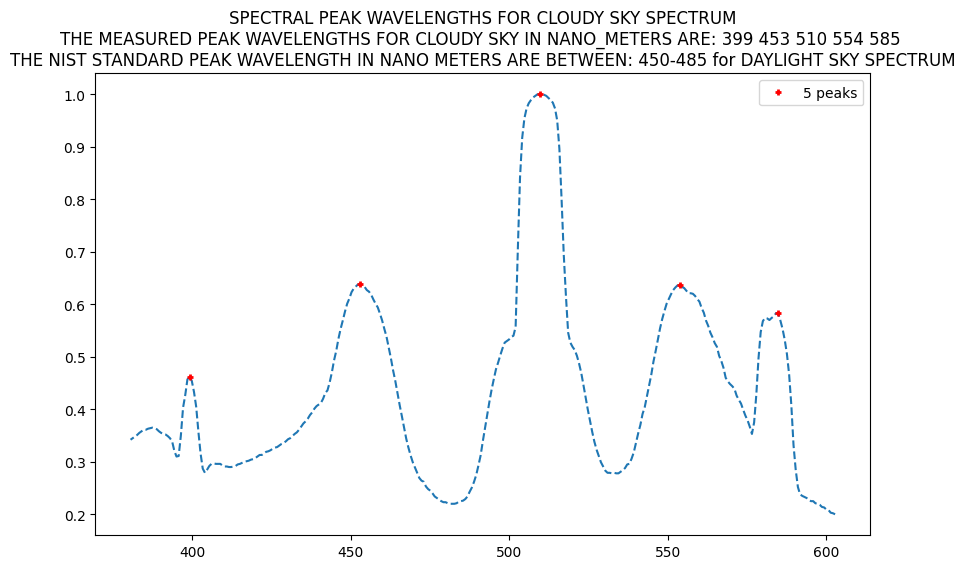

In [26]:
#       Print the Spectral Peaks table of wavelengths 
#       for current spectral image obtained
csv_tbl_filename = tbl_filename + ".csv"
bdslibv5.export_csv(tbl_filename, normalized_results)

#       Uncomment and change these thresholds if necessary if
#       you would like to increase or decrease the number
#       of Spectral peaks found

#samp_th = 0.2
#wlen_th = 10
#       Call function to draw the Spectral Peaks which will
#       Plot the peaks and return a list of Peak Wavelengths
pks_png_filename = pks_filename + ".png"
peak_wl, t1, t2 = bdslibv5.draw_spectral_line_peaks(element,csv_tbl_filename, pks_png_filename, desc, samp_th, wlen_th)
bdslibv5.display_bds_params(name,desc,shutter,slit_topadj,slit_botadj,spectrum_angle,wavelength_factor,samp_th,wlen_th)
par_txt_filename = par_filename + ".txt"
bdslibv5.write_bds_params(par_txt_filename,name,desc,shutter,slit_topadj,slit_botadj,spectrum_angle,wavelength_factor,samp_th,wlen_th)

In [27]:
pattern = pilimg.open(cht_png_filename).convert('RGBA')
#txt = pilimg.new('RGBA', pattern.size, (255,255,255,0))
size = width, height = pattern.size
draw = pildraw.Draw(pattern,'RGBA')
font = pilfont.truetype('Lato-Regular.ttf', 12)
#print(size)
draw.text((0,0), desc.upper(), font=font, fill='#000')
draw.text((0,20), t1, font=font, fill='#000')
draw.text((0,40), t2, font=font, fill='#000')
#draw.text((0,100), "Hello World", (0, 0, 0, 0),font=font)
pattern.save(cht_png_filename)

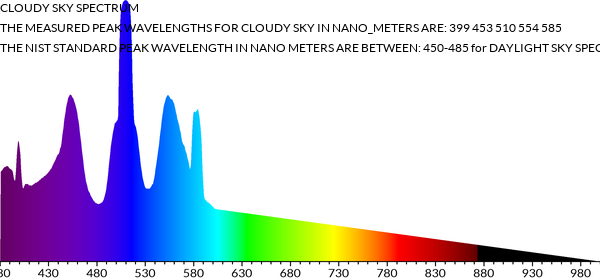

In [28]:

bdslibv5.display(Image(cht_png_filename))
#bdslibv5.display_bds_params(name,desc,shutter,slit_topadj,slit_botadj,spectrum_angle,wavelength_factor,samp_th,wlen_th)

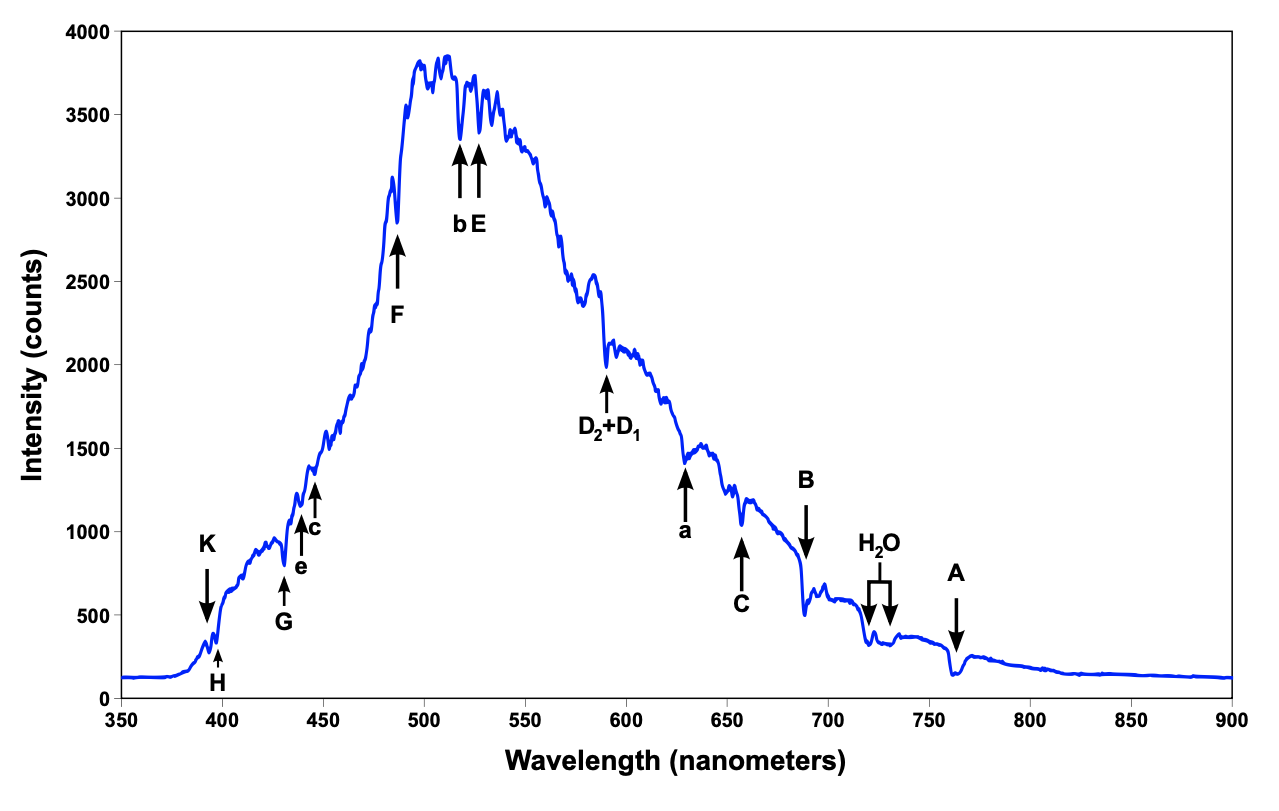

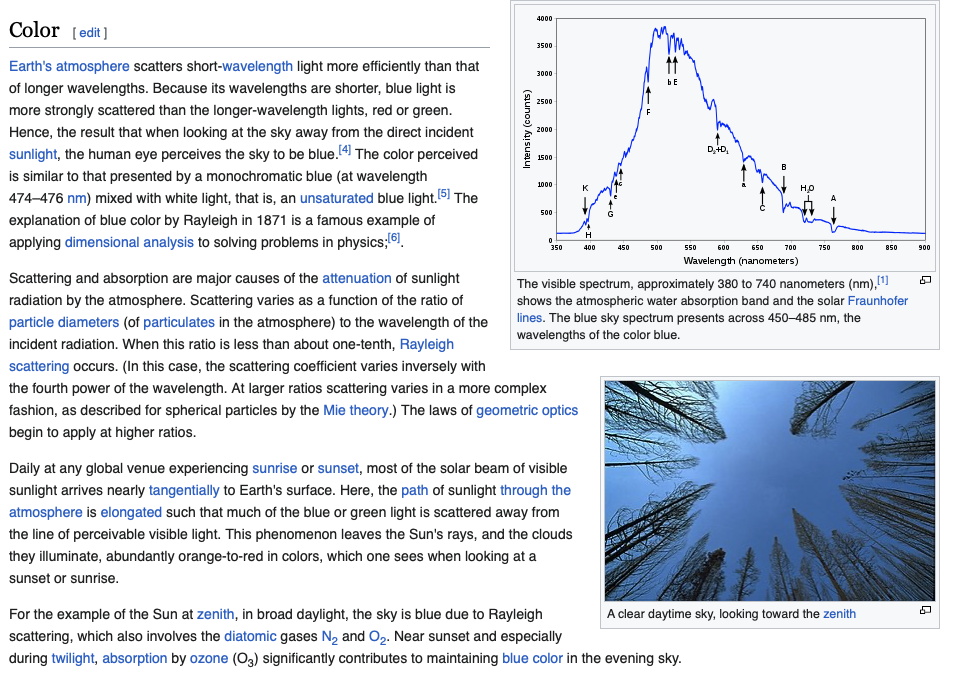

In [29]:
# Show sky spectrum
# ref: https://en.wikipedia.org/wiki/Diffuse_sky_radiation

# cfls spectrum
# ref: https://www.bealecorner.org/best/measure/cf-spectrum/
# ref: https://commons.wikimedia.org/wiki/File:Fluorescent_lighting_spectrum_peaks_labelled.gif

if 'sky' in desc.lower() or 'cloud' in desc.lower() :
    bss = "blue_sky_spectrum.png"
    display(Image(bss))
    bss = "cloudysky_wiki.png"
    display(Image(bss))   
elif 'cfls' in desc.lower() or 'flourescent' in desc.lower() :
    cfls1 = "cfls_standard.png"
    display(Image(cfls1))
    cfls2 = "cfls_plot.png"
    display(Image(cfls2))
    cfls3 = "cfls_table.png"
    display(Image(cfls3))

In [30]:
#camera.close()

In [31]:
################## STOP HERE STUDENT/INSTRUCTOR TO VALIDATE STEP 4 FINAL STEP ####################
## CONGRATULATIONS - YOU MADE A FANCY DIGITAL SPECTROSCOPE AND MADE YOUR FIRST MEASUREMENTS!
## 
## DID THE SPECTRAL CHART APPEAR ??
## DOES THE CHART LOOK CORRECT ??
## DOES IT MATCH WITH THE STANDARD FOR ELEMENTS FOUND IN THE STANDARD SPECTRUM ??
## IF NOT WE WILL MAKE ADJUSTMENTS TO PARAMETERS ABOVE AS DOCUMENTED
## MAKE CHANGES AND ASK FOR ME TO VALIDATE BEFORE PROCEEDING

# DO NOT GO FORWARD UNTIL INSTRUCTOR VALIDATES
# WHEN YOU HAVE GOOD RESULTS PRINT FROM THE "FILE->PRINT PREVIEW" FROM
# THE JUPYTER NOTEBOOK AND GET THIS NOTEBOOK PRINTED FOR VALIDATION!